In [1]:
# Imporiting initial packages needed for data importing and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
bank = pd.read_csv('bank-full.csv')

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

In [5]:
# checking and defining datatypes and variables
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
# changing data type to category.
bankcontdata=['age','balance','campaign','duration','pdays','previous']
bankcatdata=['job','marital','education','default','housing','loan','contact','month','day','poutcome','Target' ]
for col in bankcatdata:
    bank[col] = bank[col].astype('category')

In [7]:
#Checking null variables
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null category
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(11), int64(6)
memory usage: 2.5 MB


In [8]:
# Checking Dublicates
duplicatedrows= bank[bank.duplicated(keep=False)]
duplicatedrows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [9]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [10]:
# checkning data entry and looking for unusual entries
for col in bank:
    print(col)
    print(np.sort(bank[col].unique()))

age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 92 93 94 95]
job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital
['divorced' 'married' 'single']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
balance
[ -8019  -6847  -4057 ...  81204  98417 102127]
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'telephone' 'unknown']
day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
month
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
duration
[   0    1    2 ... 3785 3881 4918]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 

In [11]:
# checking data distribution among categories
for i in bankcatdata:
    print(bank[[i]].apply(pd.Series.value_counts))
# These is clear skewness in some of the variables like "job, education, contact and Poutcome" that cant be logically changes or merged

                job
blue-collar    9732
management     9458
technician     7597
admin.         5171
services       4154
retired        2264
self-employed  1579
entrepreneur   1487
unemployed     1303
housemaid      1240
student         938
unknown         288
          marital
married     27214
single      12790
divorced     5207
           education
secondary      23202
tertiary       13301
primary         6851
unknown         1857
     default
no     44396
yes      815
     housing
yes    25130
no     20081
      loan
no   37967
yes   7244
           contact
cellular     29285
unknown      13020
telephone     2906
     month
may  13766
jul   6895
aug   6247
jun   5341
nov   3970
apr   2932
feb   2649
jan   1403
oct    738
sep    579
mar    477
dec    214
     day
20  2752
18  2308
21  2026
17  1939
6   1932
5   1910
14  1848
8   1842
28  1830
7   1817
19  1757
29  1745
15  1703
12  1603
13  1585
30  1566
9   1561
11  1479
4   1445
16  1415
2   1293
27  1121
3   1079
26  1035
23   939

In [12]:
# as seen before the data is unbaalnced as the target variable is skewed.
bank.describe()
# It is identifiable that there is alot of outliers in this data from the following table.

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
from collections import Counter
checkoutlier = Counter(bank['previous'].sort_values())
bank = bank[bank.previous != 275]
checkoutlier
# one clear outlier found in the "Previous" varibale treated by dropping it.

Counter({0: 36954,
         1: 2772,
         2: 2106,
         3: 1142,
         4: 714,
         5: 459,
         6: 277,
         7: 205,
         8: 129,
         9: 92,
         10: 67,
         11: 65,
         12: 44,
         13: 38,
         14: 19,
         15: 20,
         16: 13,
         17: 15,
         18: 6,
         19: 11,
         20: 8,
         21: 4,
         22: 6,
         23: 8,
         24: 5,
         25: 4,
         26: 2,
         27: 5,
         28: 2,
         29: 4,
         30: 3,
         32: 1,
         35: 1,
         37: 2,
         38: 2,
         40: 1,
         41: 1,
         51: 1,
         55: 1,
         58: 1,
         275: 1})

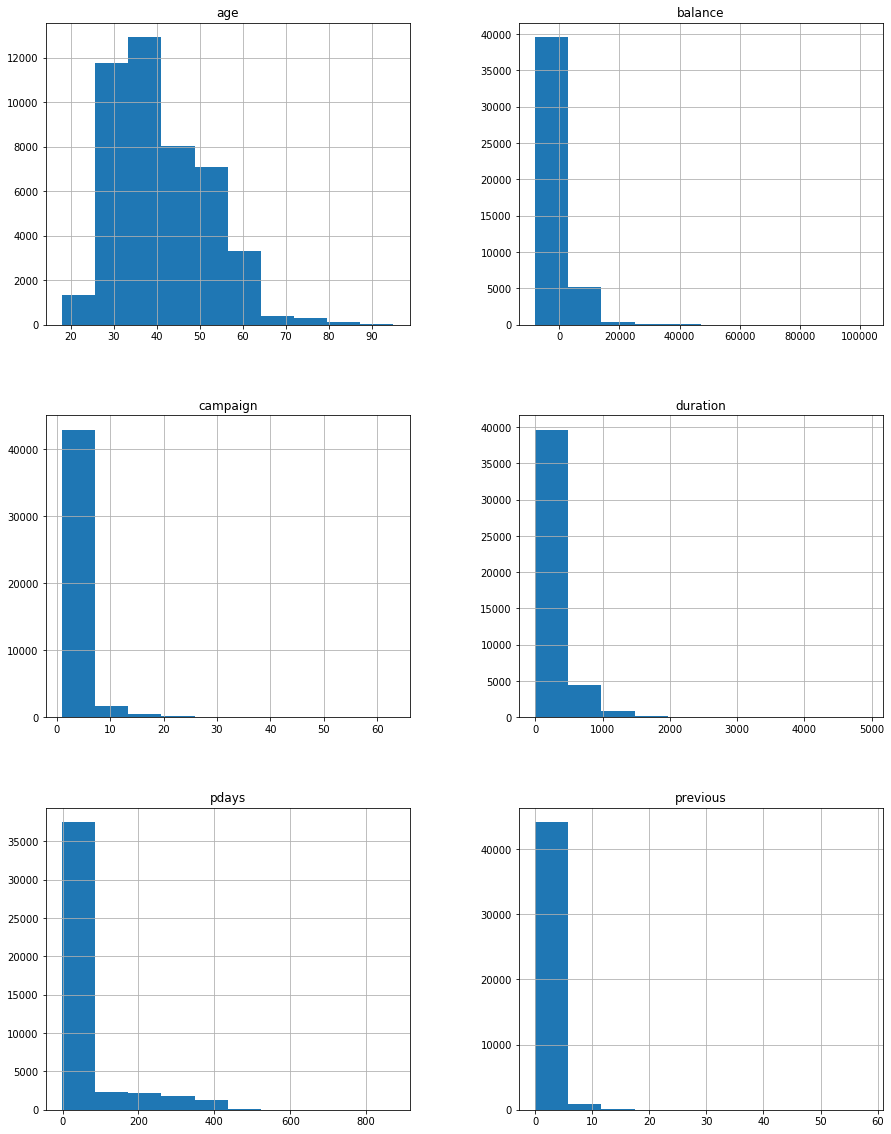

In [14]:
hist = bank.hist(figsize = (15,20))
# These figures showing clear skewness in "Balance, campaign, duration, pdays and previous" Variables

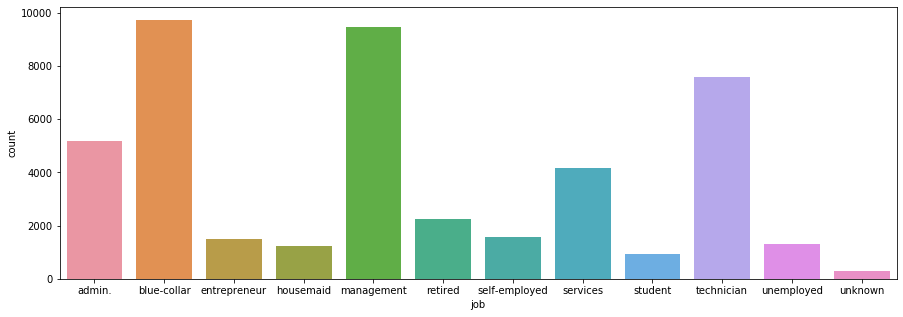

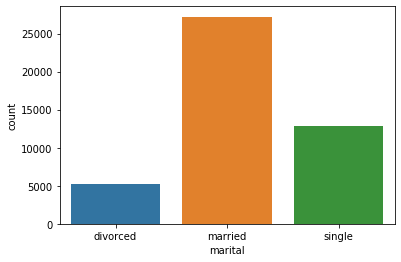

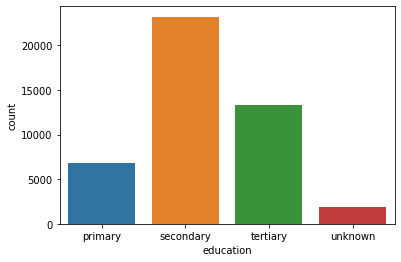

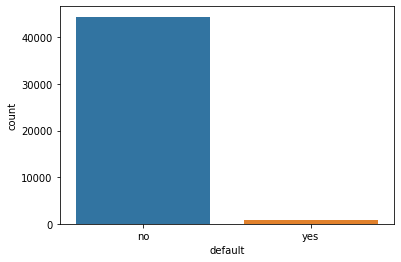

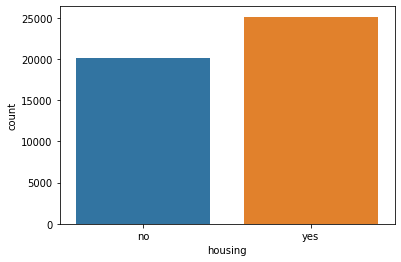

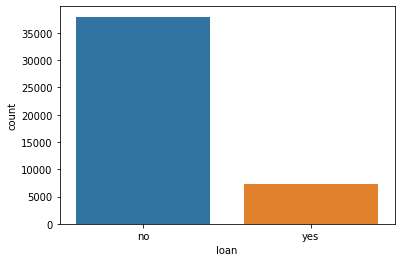

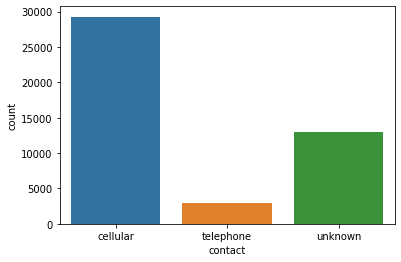

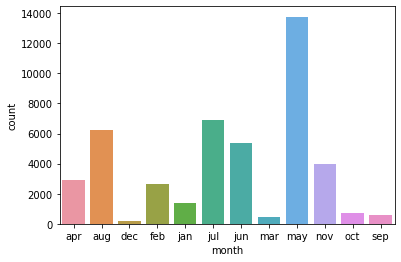

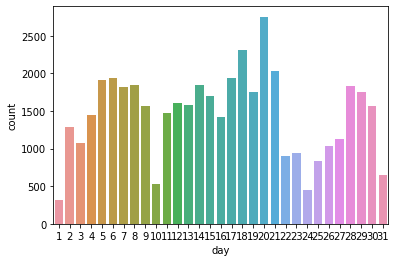

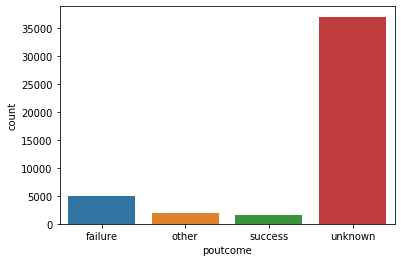

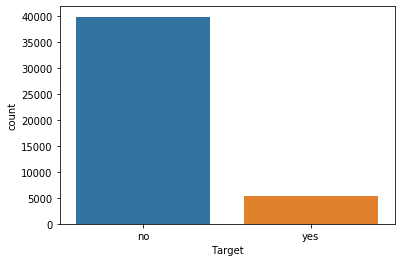

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(figsize = (15,5))
for i in bankcatdata:    
    sns.countplot(x=i, data=bank)
    plt.figure()
# the following graphs are showing imbalance in the cat. variables, especially "Target" variable

# Bivarite analysis


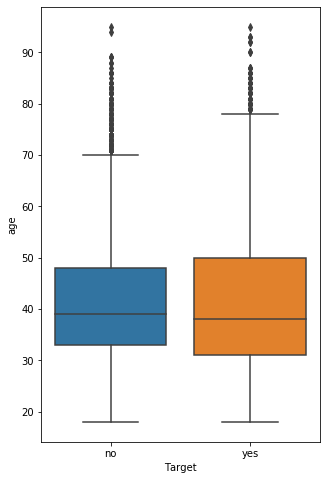

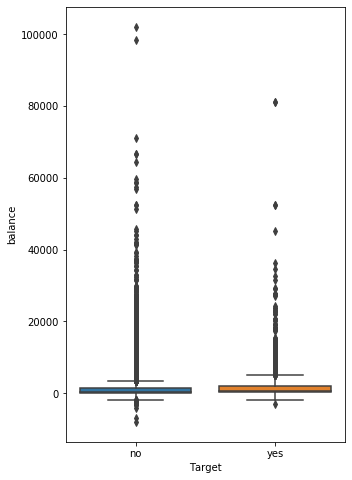

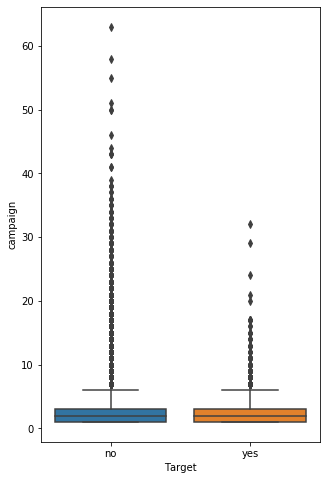

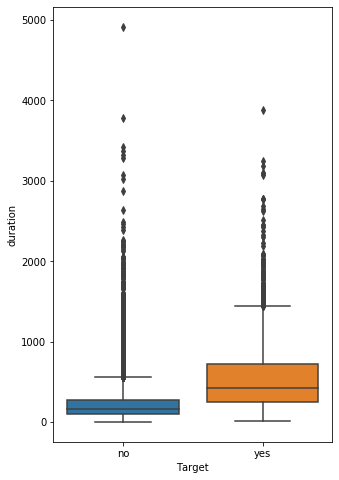

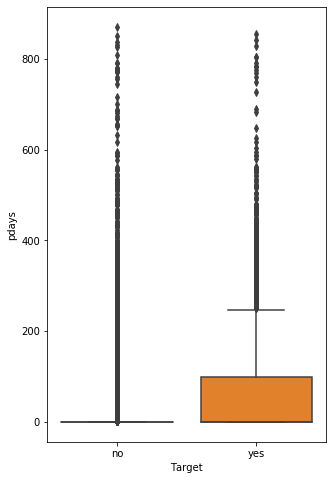

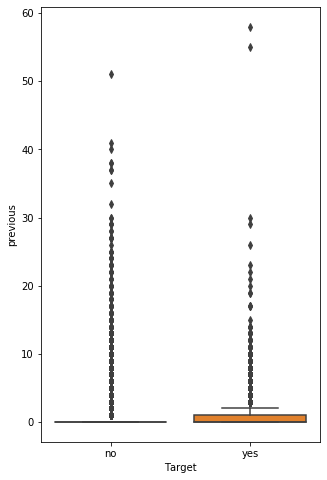

In [16]:
for i in bankcontdata:
    plt.figure(i, figsize=(5,8))
    sns.boxplot(y=i, x="Target", data=bank)
#============= 
# -Outliers are clearly identified in the following graphs.
# -these outliers will not be treated as they are logical and can happen in real life and there is no discontinuation
# of data sequence between the entries
#============= 


<Figure size 1440x360 with 0 Axes>

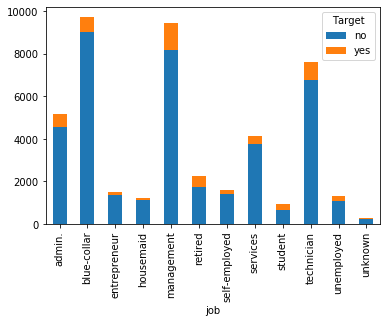

<Figure size 1440x360 with 0 Axes>

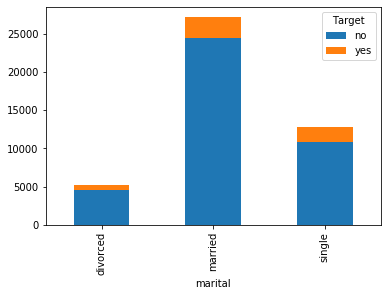

<Figure size 1440x360 with 0 Axes>

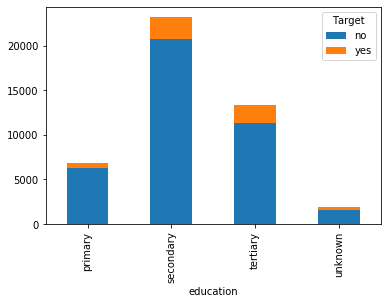

<Figure size 1440x360 with 0 Axes>

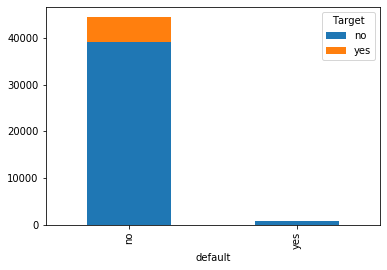

<Figure size 1440x360 with 0 Axes>

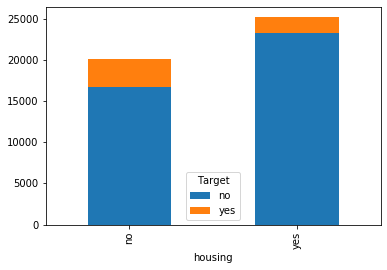

<Figure size 1440x360 with 0 Axes>

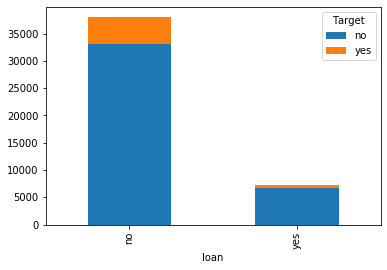

<Figure size 1440x360 with 0 Axes>

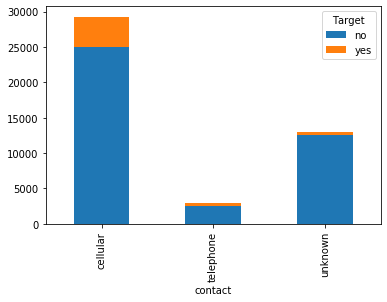

<Figure size 1440x360 with 0 Axes>

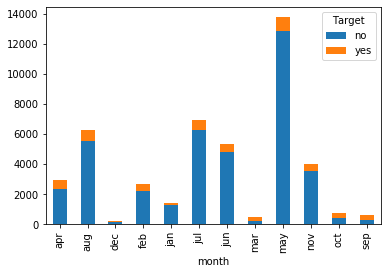

<Figure size 1440x360 with 0 Axes>

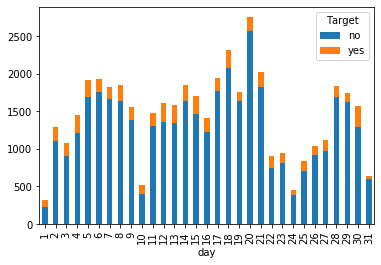

<Figure size 1440x360 with 0 Axes>

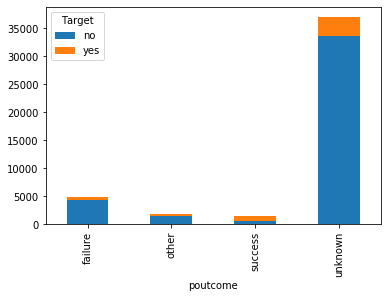

In [17]:
bankcatdata1=['job','marital','education','default','housing','loan','contact','month','day','poutcome' ]
for i in bankcatdata1:
    plt.figure(i, figsize=(20,5))
    df_plot = bank.groupby([i, 'Target']).size().reset_index().pivot(columns='Target', index=i, values=0)
    df_plot.plot(kind='bar', stacked=True)
#=============
# -Following graphs shows the cat. varibales groupedby "Target" Variable
# -It showes that the impotance of each catigorical variable and how many person got "Yes" in every one of them.
# -We can see that most people got positive "Target results" are those who works in management, those who had no default before
# those didnt have loan and who had  cellular contact method.
#=============

In [18]:
# Coding all variables to check for correlation status
replaceStruct = {
                "job":     {"blue-collar": 1, "management": 2 ,"technician": 3 ,"admin.":4 ,"retired":5 ,"services":6
                            ,"self-employed":7,"entrepreneur":8,"unemployed":9,"housemaid":10,"student":11,"unknown":-1},
                "marital": {"married": 1, "single":2 , "divorced": 3},
                 "education": {"primary": 1, "secondary":2 , "tertiary": 3,"unknown": -1},
                "contact":     {"cellular": 1, "telephone": 2 ,"unknown": -1},
                "month":     {"jan": 1, "feb": 2 ,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10
                             ,"nov": 11,"dec": 12},
                "poutcome":     {"unknown": -1, "failure": 1, "success": 2, "other": 3 },
                "Target":     {"no": 0, "yes": 1 }, 
                    "default":     {"no": 0, "yes": 1 }, 
                    "housing":     {"no": 0, "yes": 1 },
                    "loan":     {"no": 0, "yes": 1 } 
                        }
bankallcoded=bank.replace(replaceStruct)
bankallcoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,2,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,1,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,0
3,47,1,1,-1,0,1506,1,0,-1,5,5,92,1,-1,0,-1,0
4,33,-1,2,-1,0,1,0,0,-1,5,5,198,1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,3,0,825,0,0,1,17,11,977,3,-1,0,-1,1
45207,71,5,3,1,0,1729,0,0,1,17,11,456,2,-1,0,-1,1
45208,72,5,1,2,0,5715,0,0,1,17,11,1127,5,184,3,2,1
45209,57,1,1,2,0,668,0,0,2,17,11,508,4,-1,0,-1,0


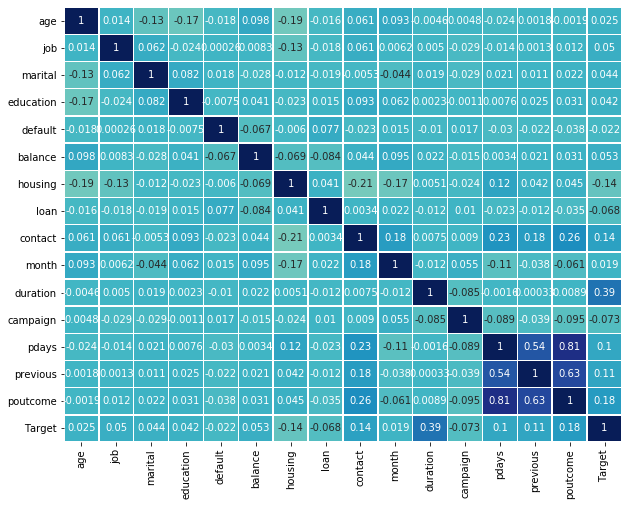

In [19]:
plt.figure(figsize=(10,8))

sns.heatmap(bankallcoded.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()
# Only significant correlation noticed is between Pdays and Poutcome (0.81)

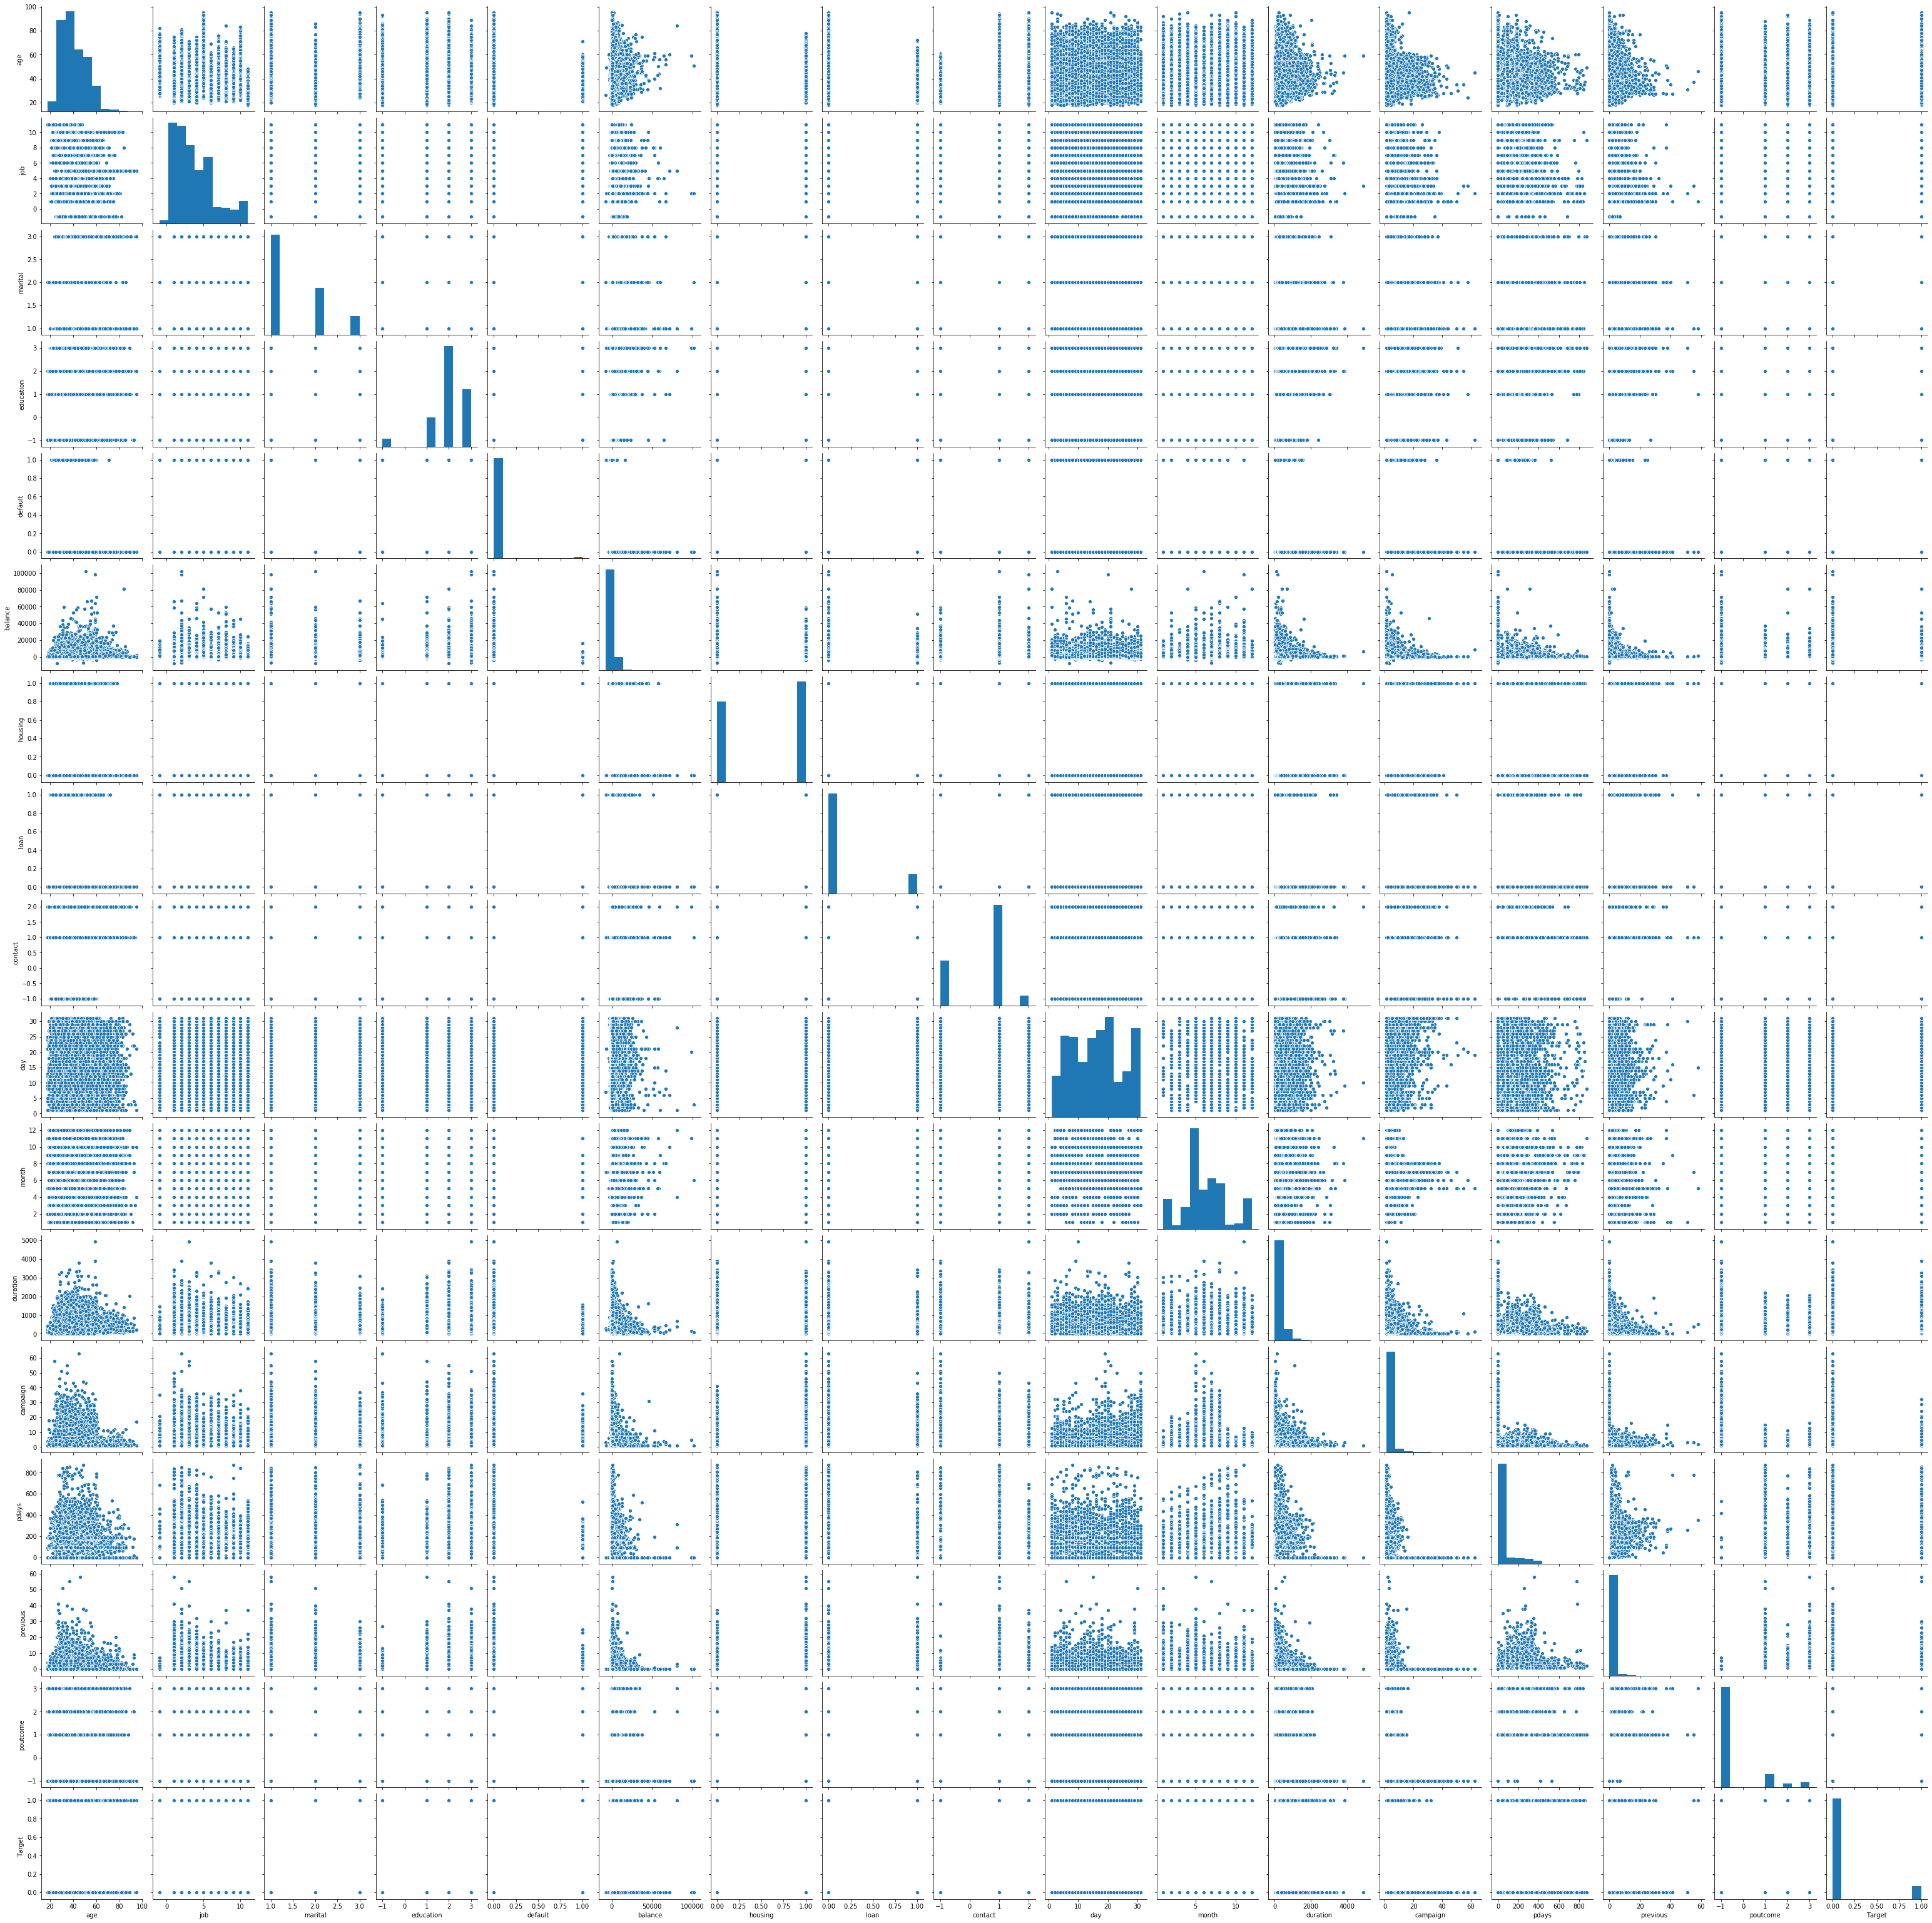

In [20]:
sns.pairplot(bankallcoded, palette="husl")
# similar findings compared with the previous Corr heatmap

# Logestic Regression model:

**for doing this model we will have to modify the data more and to do normalization**

In [21]:
# Preparing data for splitting including one-hot-encoding for logestic regression
replacevariables = {
                "Target":     {"no": 0, "yes": 1 }, 
                "default":     {"no": 0, "yes": 1 }, 
                "housing":     {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 } 
                        }
CatCols=["job","marital","contact","poutcome","education"]
logesticbank=bank.replace(replacevariables)
logesticbank=pd.get_dummies(logesticbank, columns=CatCols)
logesticbank=logesticbank.drop(['day', 'month','duration'], axis=1)

In [22]:
# Data normalization will be done for the balance and pdays variable
from sklearn import preprocessing
robust=preprocessing.RobustScaler()
Sbalance = logesticbank.iloc[:,[3]].values
logesticbank['balance'] = robust.fit_transform(Sbalance)

Spdays = logesticbank.iloc[:,[7]].values
logesticbank['pdays'] = robust.fit_transform(Spdays)

In [23]:
# Data spliting
from sklearn.model_selection import train_test_split

features = [col for col in logesticbank.columns if col != 'Target']

X_train, X_test, Y_train, Y_test = train_test_split(logesticbank[features], logesticbank['Target'], test_size=.3, random_state=3)
X_train.shape, X_test.shape

((31647, 34), (13563, 34))

In [24]:
#Checking which solver will result in better outcome....
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model1 = LogisticRegression(max_iter=5000)
parameters = {'solver' : ['liblinear','sag','saga','ibfgs','newton-cg']}
bestmodel = GridSearchCV(model1, parameters)
bestmodel.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ['liblinear', 'sag', 'saga', 'ibfgs',
                                    'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
# Fit the model on train
model = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=400, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)
model.fit(X_train, Y_train)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4        5         6  \
0  0.002995 -0.205834 -0.02973 -0.553561 -0.491019 -0.09931  0.010435   

          7         8         9  ...        25        26        27        28  \
0  0.010435  0.057012 -0.142803  ... -0.761818 -0.715691 -0.407814  1.406134   

         29        30       31        32        33  intercept  
0 -0.806459 -0.291065 -0.19402  0.034208 -0.072953  -0.577328  

[1 rows x 35 columns]


In [26]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
Y_predict = model.predict(X_test)
train= model.score(X_train, Y_train)
test= model.score(X_test, Y_test)
modelaccuracy=accuracy_score(Y_test, Y_predict)
recall=recall_score(Y_test, Y_predict)
precision=precision_score(Y_test, Y_predict)
F1=f1_score(Y_test, Y_predict)
AUC=roc_auc_score(Y_test, Y_predict)

pd.crosstab(Y_test, Y_predict, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,11893,118
1,1271,281


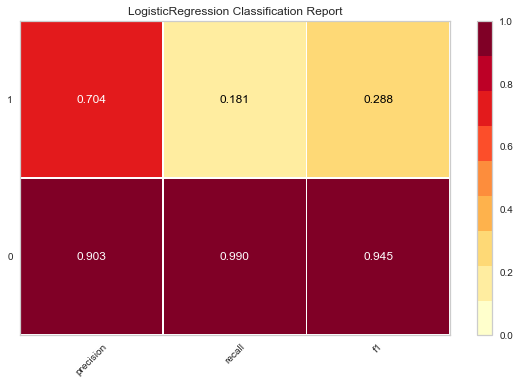

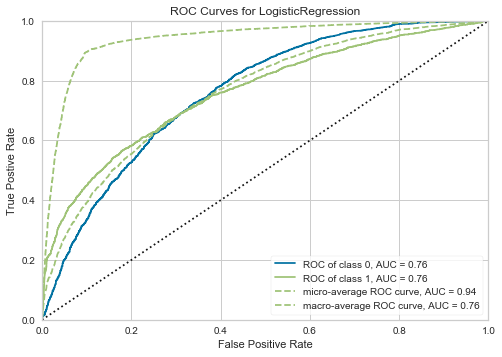

In [27]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=400, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

roc = ROCAUC(LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=400, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc.show()

In [28]:
resultsDf=[]
resultsDf = pd.DataFrame({'Method':['Logestic regression'], 'train': train,'test': test,
                          'accuracy': modelaccuracy, 'recall':recall, 'precision':precision, 'F1 error': F1, 'AUC': AUC
                         , 'Micro Avg AUC': 0.94})
resultsDf

,Method,train,test,accuracy,recall,precision,F1 error,AUC,Micro Avg AUC
0,Logestic regression,0.890827,0.897589,0.897589,0.181057,0.704261,0.288057,0.585616,0.94


# **In the next section i will try different models to check for the best models will be tested are:**
1. Decision tress
2. Random forest
3. Adaptive boost
4. Bagging classification
5. Gradient boosting

In [29]:
# Preparing data for splitting including one-hot-encoding
replacevariables = {
                "education": {"primary": 1, "secondary":2 , "tertiary": 3,"unknown": -1},
                "Target":     {"no": 0, "yes": 1 }, 
                "default":     {"no": 0, "yes": 1 }, 
                "housing":     {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 } 
                        }
CatCols=["job","marital","contact","poutcome"]
finalbank=bank.replace(replacevariables)
finalbank=pd.get_dummies(finalbank, columns=CatCols)
finalbank=finalbank.drop(['day', 'month','duration'], axis=1)

# The date we are dealing with is skewed and there is a propable multicollinearity between "pdays and previos" variabls
# going for nonparametric model is better than parametric in this situation
# No need for data normalization in this situation

In [30]:
# Data spliting
from sklearn.model_selection import train_test_split

features = [col for col in finalbank.columns if col != 'Target']

x_train, x_test, y_train, y_test = train_test_split(finalbank[features], finalbank['Target'], test_size=.3, random_state=3)
x_train.shape, x_test.shape

((31647, 31), (13563, 31))

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_entropy.fit(x_train, y_train)


y_predict = model_entropy.predict(x_test)
train= model_entropy.score(x_train, y_train)
test= model_entropy.score(x_test, y_test)
modelaccuracy=accuracy_score(y_test, y_predict)
recall=recall_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
F1=f1_score(y_test, y_predict)
AUC=roc_auc_score(y_test, y_predict)

pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11865,146
1,1233,319


In [32]:
#  importing needed packages for tree visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

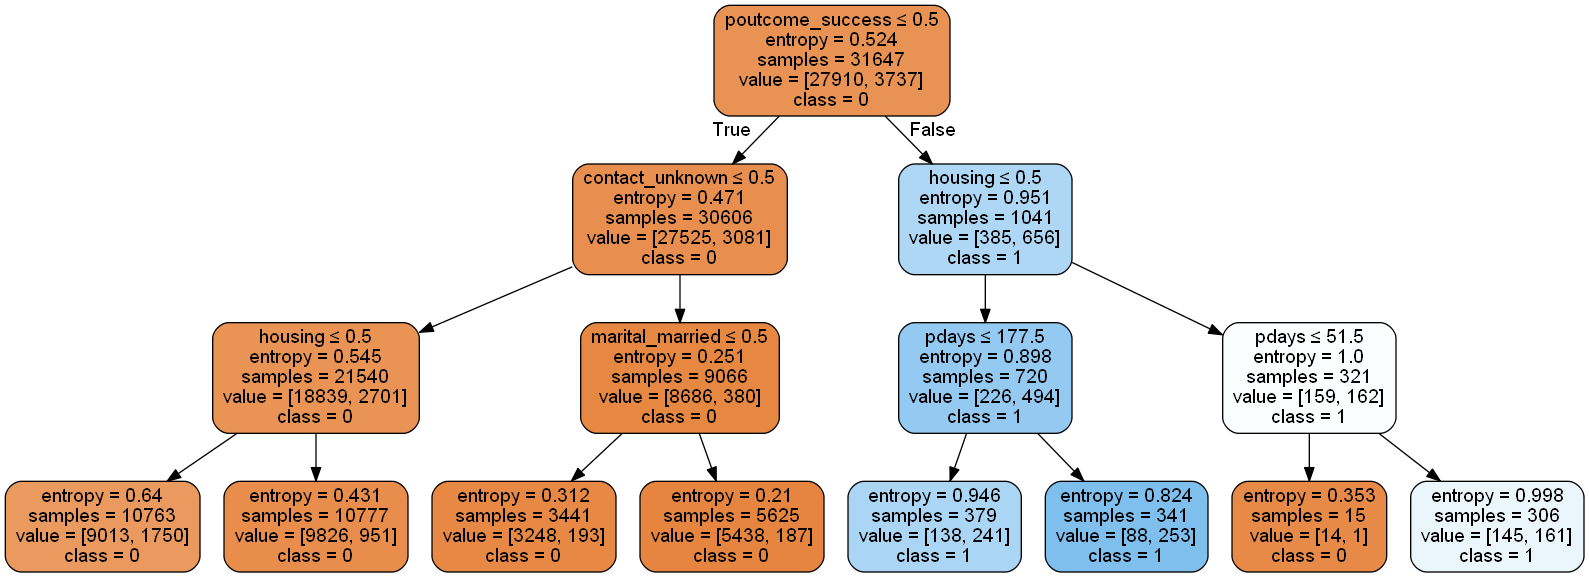

In [33]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Pruned-data.png')
Image(graph.create_png())

In [34]:
feat_importance = model_entropy.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, model_entropy.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome_success,0.636456
contact_unknown,0.223587
housing,0.120084
marital_married,0.010571
pdays,0.009302
age,0.000000
job_student,0.000000
poutcome_other,0.000000
poutcome_failure,0.000000
contact_telephone,0.000000


**We can see from the above table that the important variables in this model is the following:**
1. poutcome
2. contact
3. housing
4. marital
5. pdays

The rest of the variables can be savely dropped from the model as per the current available dataset

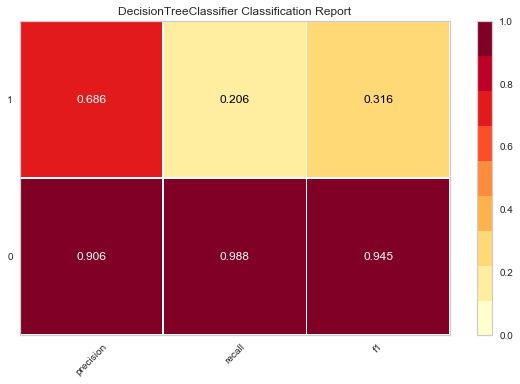

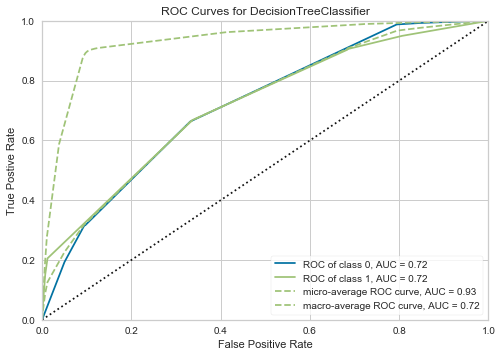

In [35]:
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=3))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=3))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [36]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'train': train,'test': test,
                          'accuracy': modelaccuracy, 'recall':recall, 'precision':precision, 'F1 error': F1, 'AUC': AUC
                         , 'Micro Avg AUC': 0.93})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,train,test,accuracy,recall,precision,F1 error,AUC,Micro Avg AUC
0,Logestic regression,0.890827,0.897589,0.897589,0.181057,0.704261,0.288057,0.585616,0.94
0,Decision Tree,0.890890,0.898326,0.898326,0.205541,0.686022,0.316311,0.596693,0.93


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)
rf = rf.fit(x_train, y_train)

y_predict = rf.predict(x_test)
train= rf.score(x_train, y_train)
test= rf.score(x_test, y_test)
modelaccuracy=accuracy_score(y_test, y_predict)
recall=recall_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
F1=f1_score(y_test, y_predict)
AUC=roc_auc_score(y_test, y_predict)

pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11711,300
1,1214,338


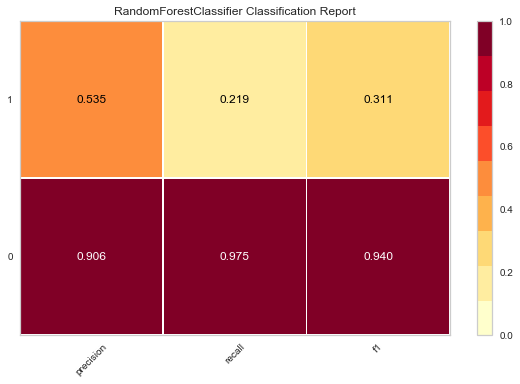

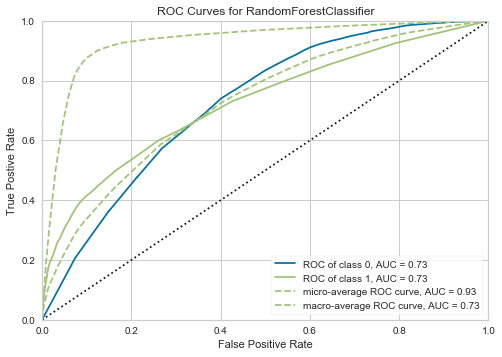

In [38]:
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [39]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'train': train,'test': test,
                          'accuracy': modelaccuracy, 'recall':recall, 'precision':precision, 'F1 error': F1, 'AUC': AUC
                         , 'Micro Avg AUC': 0.93})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,train,test,accuracy,recall,precision,F1 error,AUC,Micro Avg AUC
0,Logestic regression,0.890827,0.897589,0.897589,0.181057,0.704261,0.288057,0.585616,0.94
0,Decision Tree,0.890890,0.898326,0.898326,0.205541,0.686022,0.316311,0.596693,0.93
0,Random Forest,0.998325,0.888373,0.888373,0.217784,0.529781,0.308676,0.596403,0.93


In [40]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50, learning_rate=0.1, random_state=3)
abcl = abcl.fit(x_train, y_train)


y_predict = abcl.predict(x_test)
train= abcl.score(x_train, y_train)
test= abcl.score(x_test, y_test)
modelaccuracy=accuracy_score(y_test, y_predict)
recall=recall_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
F1=f1_score(y_test, y_predict)
AUC=roc_auc_score(y_test, y_predict)

pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,11959,52
1,1401,151


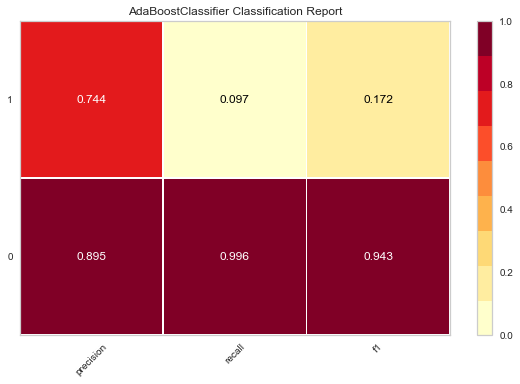

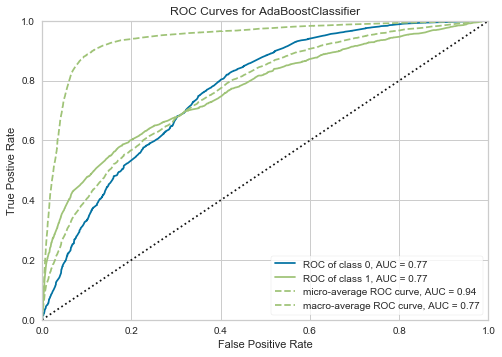

In [41]:
viz = ClassificationReport(AdaBoostClassifier(n_estimators = 50, learning_rate=0.1, random_state=3))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators = 50, learning_rate=0.1, random_state=3))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [42]:
tempResultsDf = pd.DataFrame({'Method':['Adaptive boost'], 'train': train,'test': test,
                          'accuracy': modelaccuracy, 'recall':recall, 'precision':precision, 'F1 error': F1, 'AUC': AUC
                         , 'Micro Avg AUC': 0.94})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,train,test,accuracy,recall,precision,F1 error,AUC,Micro Avg AUC
0,Logestic regression,0.890827,0.897589,0.897589,0.181057,0.704261,0.288057,0.585616,0.94
0,Decision Tree,0.890890,0.898326,0.898326,0.205541,0.686022,0.316311,0.596693,0.93
0,Random Forest,0.998325,0.888373,0.888373,0.217784,0.529781,0.308676,0.596403,0.93
0,Adaptive boost,0.886846,0.892870,0.892870,0.097294,0.743842,0.172080,0.546482,0.94


In [43]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=3)
bgcl = bgcl.fit(x_train, y_train)



y_predict = bgcl.predict(x_test)
train= bgcl.score(x_train, y_train)
test= bgcl.score(x_test, y_test)
modelaccuracy=accuracy_score(y_test, y_predict)
recall=recall_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
F1=f1_score(y_test, y_predict)
AUC=roc_auc_score(y_test, y_predict)

pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,11802,209
1,1221,331


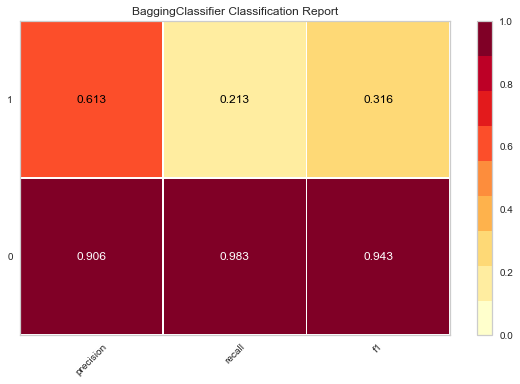

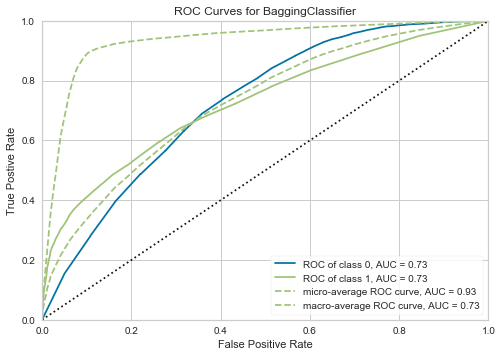

In [44]:
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=3))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=3))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [45]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Cla'], 'train': train,'test': test,
                          'accuracy': modelaccuracy, 'recall':recall, 'precision':precision, 'F1 error': F1, 'AUC': AUC
                         , 'Micro Avg AUC': 0.93})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,train,test,accuracy,recall,precision,F1 error,AUC,Micro Avg AUC
0,Logestic regression,0.890827,0.897589,0.897589,0.181057,0.704261,0.288057,0.585616,0.94
0,Decision Tree,0.890890,0.898326,0.898326,0.205541,0.686022,0.316311,0.596693,0.93
0,Random Forest,0.998325,0.888373,0.888373,0.217784,0.529781,0.308676,0.596403,0.93
0,Adaptive boost,0.886846,0.892870,0.892870,0.097294,0.743842,0.172080,0.546482,0.94
0,Bagging Cla,0.978987,0.894566,0.894566,0.213273,0.612963,0.316444,0.597936,0.93


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=3)
gbcl = gbcl.fit(x_train, y_train)

y_predict = gbcl.predict(x_test)
train= gbcl.score(x_train, y_train)
test= gbcl.score(x_test, y_test)
modelaccuracy=accuracy_score(y_test, y_predict)
recall=recall_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
F1=f1_score(y_test, y_predict)
AUC=roc_auc_score(y_test, y_predict)

pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,11909,102
1,1261,291


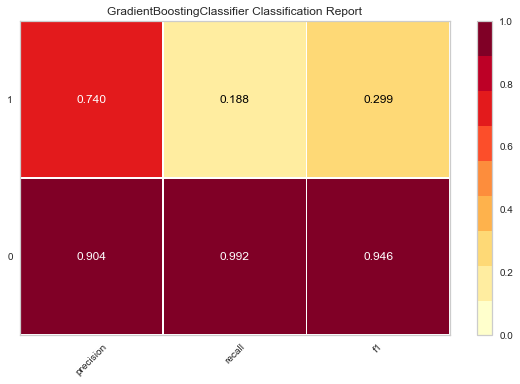

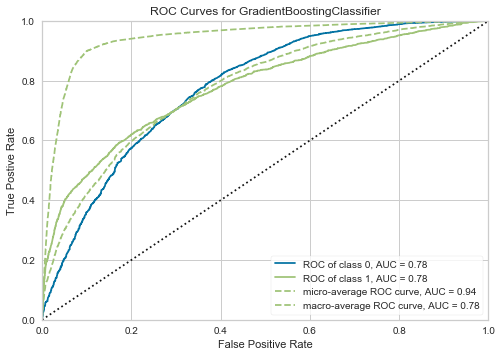

In [47]:
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=3))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=3))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [48]:
tempResultsDf = pd.DataFrame({'Method':['Gradient boosting'], 'train': train,'test': test,
                          'accuracy': modelaccuracy, 'recall':recall, 'precision':precision, 'F1 error': F1, 'AUC': AUC
                         , 'Micro Avg AUC': 0.94})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,train,test,accuracy,recall,precision,F1 error,AUC,Micro Avg AUC
0,Logestic regression,0.890827,0.897589,0.897589,0.181057,0.704261,0.288057,0.585616,0.94
0,Decision Tree,0.890890,0.898326,0.898326,0.205541,0.686022,0.316311,0.596693,0.93
0,Random Forest,0.998325,0.888373,0.888373,0.217784,0.529781,0.308676,0.596403,0.93
0,Adaptive boost,0.886846,0.892870,0.892870,0.097294,0.743842,0.172080,0.546482,0.94
0,Bagging Cla,0.978987,0.894566,0.894566,0.213273,0.612963,0.316444,0.597936,0.93
0,Gradient boosting,0.893070,0.899506,0.899506,0.187500,0.740458,0.299229,0.589504,0.94


# Conclusion

1. The above seen 6 models shows us that all of them got had model accuracy of around 89%.
2. Recall on the other hand was very low in all of the models. The best is seen with Randomforest being around 22% but with lower precision and higher F1 error compared to other models.
3. AUC and Micro Avg AUC is almost similar between all models. 93 to 94%
4. These results came as such mostly secondary to the skewness noticed in the data. Major contributor is related to that "Target Variable" is significantly unbalanced as it has more "No" than "Yes" by significant difference.
5. A model best to be chosen according to the above results would be the one with more accuracy and more Micro Avg AUC as well as more recall. We need a highest possible recall and precision as we are aiming to identify potential customers who are relatively more likely to subscribe term deposit. High precision will give the model the benefit of making targeted effort on those clients who will more likely subscribe but in the same time having low recall might lead to missing some valuable customers.
6. Choosing decision tree as the best model from the above tested group might be the solution as we have good precision and better recall comapred with other models


# Proposed solution:
Having more data might help in making the model better

# Alternative Solution:
Using stratified sampling might help in improving the recall and other metrics of the model. Using undersampling might help but might also lead to missing major valuable contribution from the not included data.

In [49]:
# Using nearmiss as a method to solve unbalanced data
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [50]:
x_nearmiss, y_nearmiss = NearMiss().fit_sample(finalbank[features], finalbank['Target'])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_nearmiss, y_nearmiss, test_size=.3, random_state=3)
x_train.shape, x_test.shape

((7404, 31), (3174, 31))

In [52]:
rf = RandomForestClassifier(n_estimators = 50)
rf = rf.fit(x_train, y_train)

y_predict = rf.predict(x_test)
train= rf.score(x_train, y_train)
test= rf.score(x_test, y_test)
modelaccuracy=accuracy_score(y_test, y_predict)
recall=recall_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
F1=f1_score(y_test, y_predict)
AUC=roc_auc_score(y_test, y_predict)

pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1454,142
1,295,1283


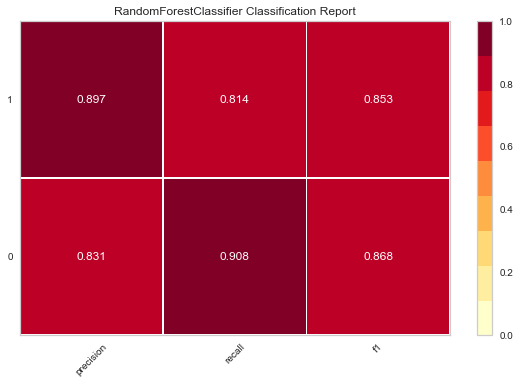

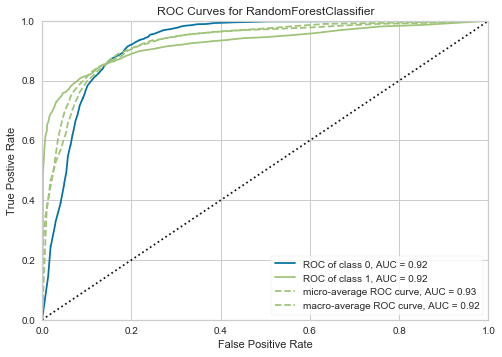

In [53]:
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [54]:
tempResultsDf = pd.DataFrame({'Method':['undersampling randomforest'], 'train': train,'test': test,
                          'accuracy': modelaccuracy, 'recall':recall, 'precision':precision, 'F1 error': F1, 'AUC': AUC
                         , 'Micro Avg AUC': 0.93})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'train','test','accuracy','recall','precision','F1 error','AUC' , 'Micro Avg AUC']]
resultsDf

,Method,train,test,accuracy,recall,precision,F1 error,AUC,Micro Avg AUC
0,Logestic regression,0.890827,0.897589,0.897589,0.181057,0.704261,0.288057,0.585616,0.94
0,Decision Tree,0.890890,0.898326,0.898326,0.205541,0.686022,0.316311,0.596693,0.93
0,Random Forest,0.998325,0.888373,0.888373,0.217784,0.529781,0.308676,0.596403,0.93
0,Adaptive boost,0.886846,0.892870,0.892870,0.097294,0.743842,0.172080,0.546482,0.94
0,Bagging Cla,0.978987,0.894566,0.894566,0.213273,0.612963,0.316444,0.597936,0.93
0,Gradient boosting,0.893070,0.899506,0.899506,0.187500,0.740458,0.299229,0.589504,0.94
0,undersampling randomforest,0.997299,0.862319,0.862319,0.813054,0.900351,0.854479,0.862041,0.93
